# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [ ]:
import torch

In [ ]:
torch.__version__

'1.8.0+cu101'

### 초기화 되지 않은 행렬 

In [ ]:
X = torch.empty(4,2)
print(X)

tensor([[-9.3855e-36,  3.0918e-41],
        [ 3.3631e-44,  0.0000e+00],
        [        nan,  3.0918e-41],
        [ 1.1578e+27,  1.1362e+30]])


### 무작위로 초기화된 행렬

In [ ]:
x = torch.rand(4,2)
print(x)

tensor([[0.6613, 0.0506],
        [0.9579, 0.8018],
        [0.4582, 0.2392],
        [0.6966, 0.8449]])


### dtype이 long, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [ ]:
x = torch.tensor([3, 1])
print(x)

tensor([3, 1])


In [ ]:
x  = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.6189, -0.1165,  0.0444, -0.4244],
        [ 0.8578, -0.2215, -1.7035, -1.1614]])


### 텐서의 크기

In [ ]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [ ]:
print(x)

tensor([[-0.6189, -0.1165,  0.0444, -0.4244],
        [ 0.8578, -0.2215, -1.7035, -1.1614]])


In [ ]:
y = torch.rand(2,4)
print(y)
print(x+y)

tensor([[0.9342, 0.3064, 0.5647, 0.6268],
        [0.7506, 0.4253, 0.3508, 0.5382]])
tensor([[ 0.3153,  0.1899,  0.6091,  0.2024],
        [ 1.6084,  0.2038, -1.3527, -0.6231]])


### 덧셈2

In [ ]:
print(torch.add(x,y))

tensor([[ 0.3153,  0.1899,  0.6091,  0.2024],
        [ 1.6084,  0.2038, -1.3527, -0.6231]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.3153,  0.1899,  0.6091,  0.2024],
        [ 1.6084,  0.2038, -1.3527, -0.6231]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [ ]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[-0.6189, -0.1165,  0.0444, -0.4244],
        [ 0.8578, -0.2215, -1.7035, -1.1614]])
tensor([[0.9342, 0.3064, 0.5647, 0.6268],
        [0.7506, 0.4253, 0.3508, 0.5382]])
tensor([[ 0.3153,  0.1899,  0.6091,  0.2024],
        [ 1.6084,  0.2038, -1.3527, -0.6231]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [ ]:
x = torch.Tensor([[1,3],[5,7]])
y = torch.Tensor([[2,4],[6,8]])
print(x -y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [ ]:
x = torch.Tensor([[1,3],[5,7]])
y = torch.Tensor([[2,4],[6,8]])
print(x * y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [ ]:
x = torch.Tensor([[1,3],[5,7]])
y = torch.Tensor([[2,4],[6,8]])
print(x / y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [ ]:
x = torch.Tensor([[1,3],[5,7]])
y = torch.Tensor([[2,4],[6,8]])
print(torch.mm(x,y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [ ]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [ ]:
print(x[:,1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [ ]:
x = torch.randn(4 ,5)
y = x.view(20)
z = x.view(5, -1)
print(x.size())
print(y.size())
print(z.size())

torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.6818])
0.6818360090255737
torch.float32


- 스칼라값 하나만 존재해야함

In [ ]:
 x = torch.radn(2)

AttributeError: ignored

### squeeze 
- 차원을 축소(제거)

In [ ]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.7348, 0.7698, 0.2569],
         [0.8531, 0.6209, 0.5339],
         [0.8903, 0.8650, 0.3697]]])
torch.Size([1, 3, 3])


In [ ]:
t =  tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.7348, 0.7698, 0.2569],
        [0.8531, 0.6209, 0.5339],
        [0.8903, 0.8650, 0.3697]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [ ]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.1591, 0.9115, 0.2865],
         [0.9283, 0.7421, 0.2833],
         [0.8085, 0.1045, 0.7540]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.unsqueeze(dim = 0)
print(t)
print(t.shape)

tensor([[[[0.1591, 0.9115, 0.2865],
          [0.9283, 0.7421, 0.2833],
          [0.8085, 0.1045, 0.7540]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [ ]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())


tensor([[[[-0.4466, -0.0786,  0.8323],
          [-1.6628, -0.1316,  1.7440],
          [-0.1648, -0.2732,  2.4555]]],


        [[[-0.7491, -0.6054, -0.3904],
          [-1.5524, -0.5495, -0.7520],
          [-0.9319, -0.1240,  1.5435]]]])
torch.Size([2, 1, 3, 3])


In [ ]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a, b), dim=2)

print(c)
print(c.size())


tensor([[[ 0.7867,  0.8470, -0.7882, -0.1062,  0.3292, -0.2544],
         [-0.8274,  0.4322,  1.4398, -0.7756,  1.0266, -0.0472],
         [ 1.0789,  0.8126, -0.5286,  0.4852,  0.5015, -2.4691]]])
torch.Size([1, 3, 6])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [ ]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor , 3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.8840, 0.2505, 0.3403, 0.4511, 0.6047, 0.9312],
        [0.6607, 0.7330, 0.3864, 0.0886, 0.4419, 0.1423],
        [0.7663, 0.4397, 0.9836, 0.2239, 0.9191, 0.6952]])
tensor([[0.8840, 0.2505],
        [0.6607, 0.7330],
        [0.7663, 0.4397]])
tensor([[0.3403, 0.4511],
        [0.3864, 0.0886],
        [0.9836, 0.2239]])
tensor([[0.6047, 0.9312],
        [0.4419, 0.1423],
        [0.9191, 0.6952]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [ ]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)
print(tensor)
print(t1)
print(t2)

tensor([[0.3215, 0.0127, 0.4238, 0.6154, 0.2458, 0.0296],
        [0.0355, 0.6473, 0.7019, 0.4698, 0.8175, 0.4594],
        [0.3279, 0.7461, 0.1733, 0.5389, 0.5534, 0.7316]])
tensor([[0.3215, 0.0127, 0.4238],
        [0.0355, 0.6473, 0.7019],
        [0.3279, 0.7461, 0.1733]])
tensor([[0.6154, 0.2458, 0.0296],
        [0.4698, 0.8175, 0.4594],
        [0.5389, 0.5534, 0.7316]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)
print(b)

tensor([4., 4., 4., 4., 4., 4., 4.])
[4. 4. 4. 4. 4. 4. 4.]


In [ ]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a , 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [ ]:
import torch

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.1078])
1.1077544689178467
torch.float32


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(device)
print(z)
print(z.to("cpu", torch.double))

cuda
tensor([2.1078], device='cuda:0')
tensor([2.1078], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [ ]:
import torch

In [ ]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
print(y.grad_fn)

In [ ]:
z =  y* y * 2
out = z.mean()
print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [ ]:
a = torch.randn(3, 3)
a = ((a * 3) / ( a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [ ]:
out.backward()

In [ ]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [ ]:
x = torch.randn(3, requires_grad=True)

y  = x * 2
while y.data.norm() <1000:
  y = y * 2
print(y)

tensor([ -36.4800, 1048.9814,  428.9340], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
import torch

In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print("a.data:", a.data)
print("a.grad:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


- $b = a + 2$

In [ ]:
b = a +2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [ ]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [ ]:
print("a.data:", a.data)
print("a.grad:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [ ]:
print("b.data:", b.data)
print("b.grad:", b.grad)
print("b.grad_fn:", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7f4f1d3eab90>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [ ]:
print("c.data:", c.data)
print("c.grad:", c.grad)
print("c.grad_fn:", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7f4f1d3f64d0>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [ ]:
print("out.data:", out.data)
print("out.grad:", out.grad)
print("out.grad_fn:", out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x7f4f1d3ee990>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [ ]:
x = torch.ones(3, requires_grad=True)
y = (x ** 2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [ ]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [ ]:
print("x.data:", x.data)
print("x.grad:", x.grad)
print("x.grad_fn:", x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [ ]:
print("y.data:", y.data)
print("y.grad:", y.grad)
print("y.grad_fn:", y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7f4f1d440cd0>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [ ]:
print("z.data:", z.data)
print("z.grad:", z.grad)
print("z.grad_fn:", z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn: <AddBackward0 object at 0x7f4f1d3fb150>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [ ]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [ ]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))

m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))

input = torch.randn(20, 16, 50, 100)
output = m(input)

In [ ]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [ ]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [ ]:
filters = torch.randn(8,4,3,3)


In [ ]:
inputs = torch.randn(1,4,5,5)
cov = F.conv2d(inputs, filters, padding=1)
cov.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5), std=(0.5))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [ ]:
trainset = torchvision.datasets.MNIST(root="/content", train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root="/content", train=False, download=True, transform=transform)

In [ ]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [ ]:
image = torch_image.numpy()
image.shape

(28, 28)

In [ ]:
label = labels[0].numpy()
label.shape

()

In [ ]:
label

array(0)

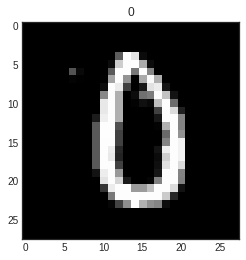

In [ ]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [ ]:
nn.Conv2d(in_channels=1, out_channels=2, kernel_size=5, stride=1)

Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [ ]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [ ]:
weigth = weight.detach()

In [ ]:
weight = weigth.numpy()
weight.shape

(20, 1, 5, 5)

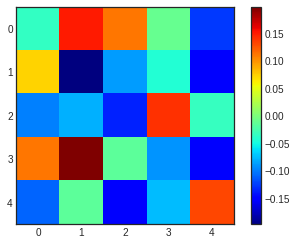

In [ ]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [ ]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [ ]:
input_image = torch.unsqueeze(images[0], dim=0)

In [ ]:
output_data = layer(input_image)

In [ ]:
output = output_data.data

In [ ]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

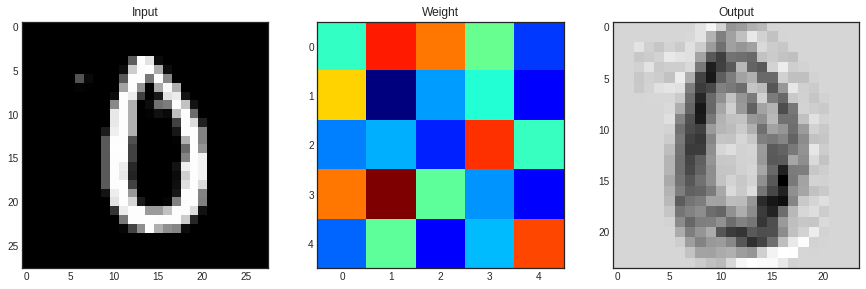

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0,0,:,:], 'jet')
plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()


### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [ ]:
image.shape

(28, 28)

In [ ]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [ ]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

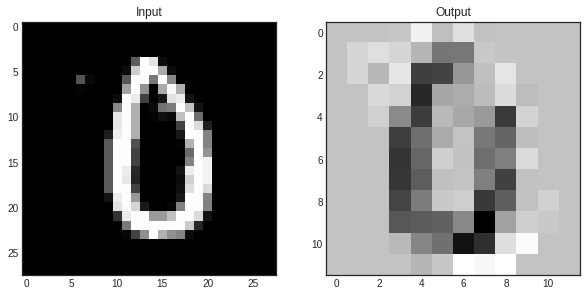

In [ ]:
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0,0,:,:], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [ ]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [ ]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [ ]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [ ]:
lin

tensor([[ 0.5427,  0.1042,  0.8553,  0.2505,  0.4040, -0.0260,  0.0838, -0.2278,
         -0.3094,  0.1292]], grad_fn=<AddmmBackward>)

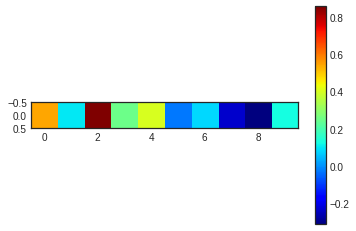

In [ ]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [ ]:
with torch.no_grad():
  flatten = image.view(1, 28* 28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [ ]:
softmax

tensor([[0.0388, 0.0958, 0.1728, 0.2155, 0.0826, 0.0819, 0.1062, 0.0932, 0.0176,
         0.0956]])

In [ ]:
np.sum(softmax.numpy())

0.99999994

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [ ]:
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape
 

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트



In [ ]:
import torch

In [ ]:
w_true = torch.Tensor([1,2,3])
print(w_true)

tensor([1., 2., 3.])


In [ ]:
x = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)
y = torch.mv(x, w_true) + torch.randn(100) * 0.5

w = torch.randn(3 , requires_grad=True)
gamma = 0.1

In [ ]:
losses = []
for epoc in range(100):
   w.grad = None
   y_pred = torch.mv(x, w)

   loss = torch.mean((y - y_pred)**2)
   loss.backward()

   w.data = w.data - gamma * w.grad.data

   losses.append(loss.item())


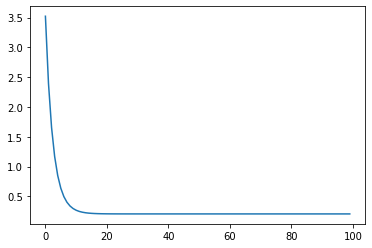

In [ ]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [ ]:
w

tensor([0.9426, 2.0007, 2.8579], requires_grad=True)

In [ ]:
from torch import nn, optim

In [ ]:
net = nn.Linear(in_features=3, out_features= 1, bias= False)

<generator object Module.parameters at 0x7fc71680e8d0>

In [ ]:
optimizer = optim.SGD(net.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

In [ ]:
losses = []

for epoc in range(100):
  optimizer.zero_grad()
  y_pred = net(x)
  loss = loss_fn(y_pred.view_as(y), y)

  loss.backward()

  optimizer.step()
  losses.append(loss.item())

In [ ]:
list(net.parameters())

[Parameter containing:
 tensor([[0.9426, 2.0007, 2.8579]], requires_grad=True)]

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
x = iris.data[:100]
y = iris.target[:100]

x = torch.tensor(x, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

In [ ]:
net = nn.Linear(4, 1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.5)

In [ ]:
losses = []

for epoc in range(100):
  optimizer.zero_grad()
  y_pred = net(x)
  loss = loss_fn(y_pred.view_as(y), y)

  loss.backward()

  optimizer.step()
  losses.append(loss.item())

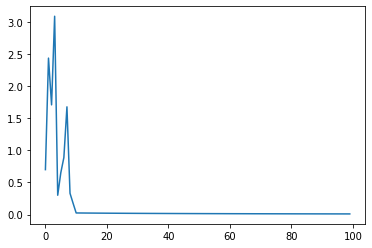

In [ ]:
plt.plot(losses)